# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
import plotly.express as ex
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [236]:
#Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [237]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Days hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days.astype('int32')

df = df.drop(columns = ['Date of Admission', 'Discharge Date', 'Room Number','Name', 'Doctor', 'Hospital'], axis = 1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days hospitalized
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


In [238]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test Results          0
Days hospitalized     0
dtype: int64


In [239]:
#outlier
df.describe()

,Age,Billing Amount,Days hospitalized
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112566,16.000000
75%,68.000000,37733.913727,23.000000
max,85.000000,49995.902283,30.000000


<AxesSubplot:>

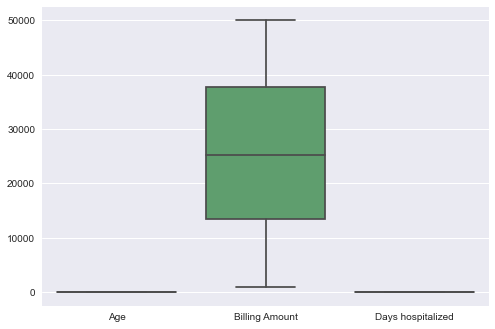

In [240]:
sns.boxplot(data=df)

In [241]:
#skew
df.skew()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13488\3319951774.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Age                 -0.012148
Billing Amount       0.012721
Days hospitalized   -0.002663
dtype: float64

In [242]:
#EDA
df.describe(exclude = ['O']) #numerical

,Age,Billing Amount,Days hospitalized
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112566,16.000000
75%,68.000000,37733.913727,23.000000
max,85.000000,49995.902283,30.000000


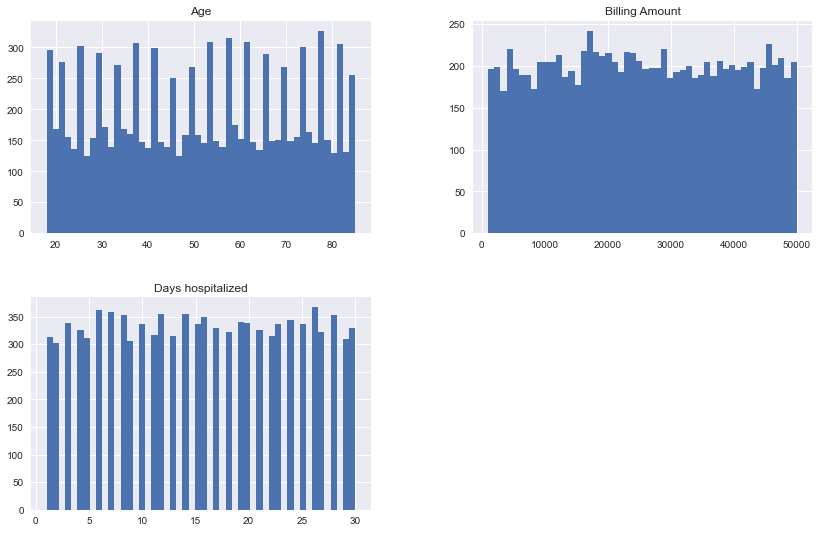

In [243]:
df.hist(bins=50, figsize=(14,9))
plt.show()

In [244]:
df.describe(include = ['O']) #categorical

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000
unique,2,8,6,5,3,5,3
top,Female,AB-,Asthma,Cigna,Urgent,Penicillin,Abnormal
freq,5075,1275,1708,2040,3391,2079,3456


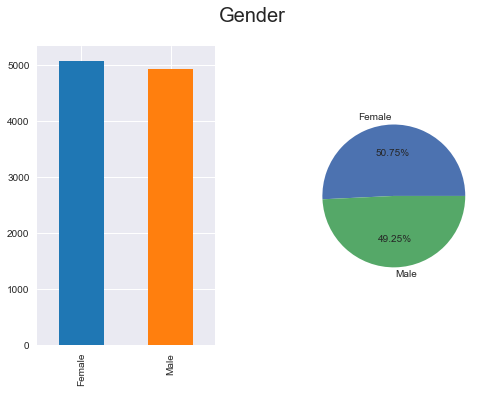

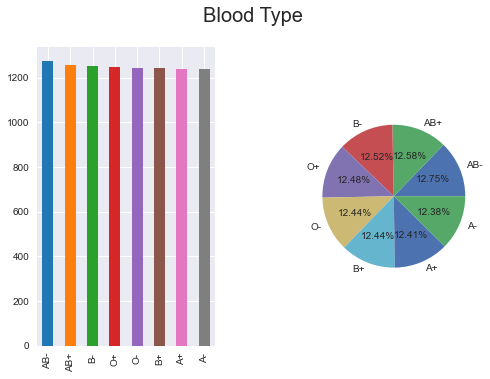

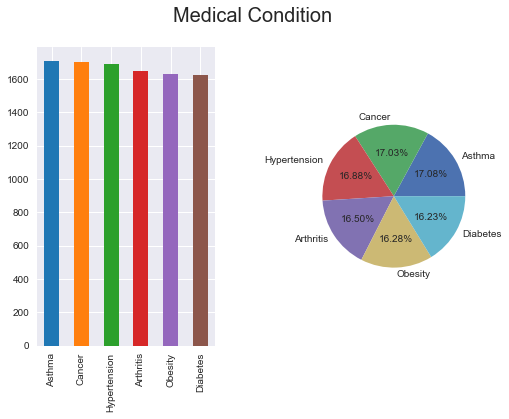

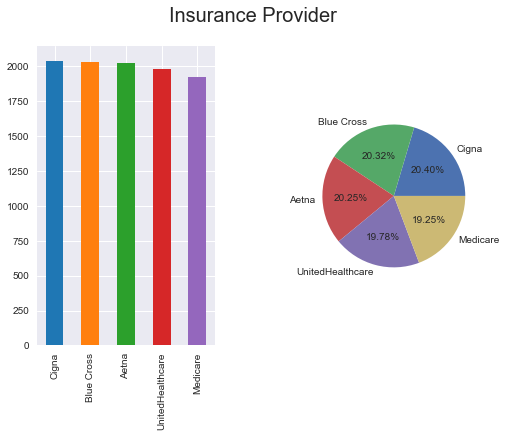

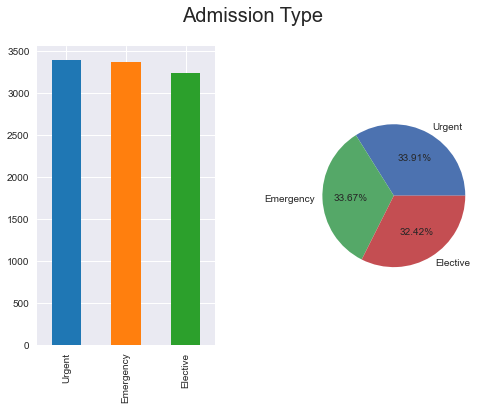

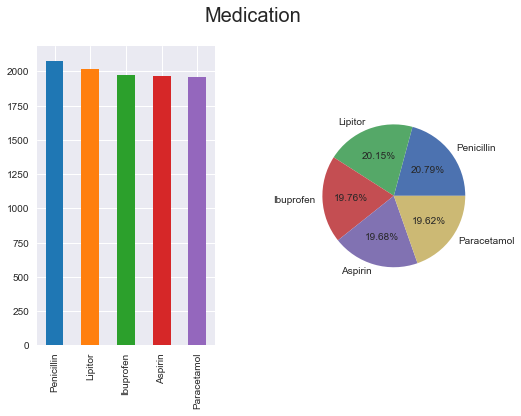

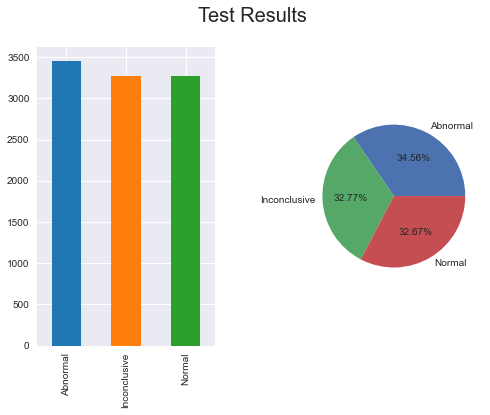

In [245]:
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

for i in cols:
    if i == 'Gender':
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle('Gender', fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.gca().set_ylabel('')
        plt.subplots_adjust(wspace=0.5)
        plt.show()
    
    else:
        fig, ax = plt.subplots(1, 2) 
        fig.suptitle(i, fontsize=20) 
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.gca().set_ylabel('')
        plt.subplots_adjust(wspace=0.5)
        plt.show()

In [246]:
#show the Highest Features based on Billing Amount
cat_cols = ['Gender','Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type',
        'Medication']

for i in cols:
    if i == 'Gender':
        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)
        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Billing Amount"]))
        fig.update_layout(title="Highest Gender According to " + 'Billing Amount',
                          xaxis_title='Gender',
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))
        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)
        
    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index()
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False)
        top = char_bar.head(10)
        fig = go.Figure()
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount']))
        fig.update_layout(title="Highest " + i + " According to Billing Amount",
                          xaxis_title= i,
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white', 
                          paper_bgcolor='white',  
                          font=dict(color='black'))
        pyo.init_notebook_mode(connected=True)
        pyo.iplot(fig)

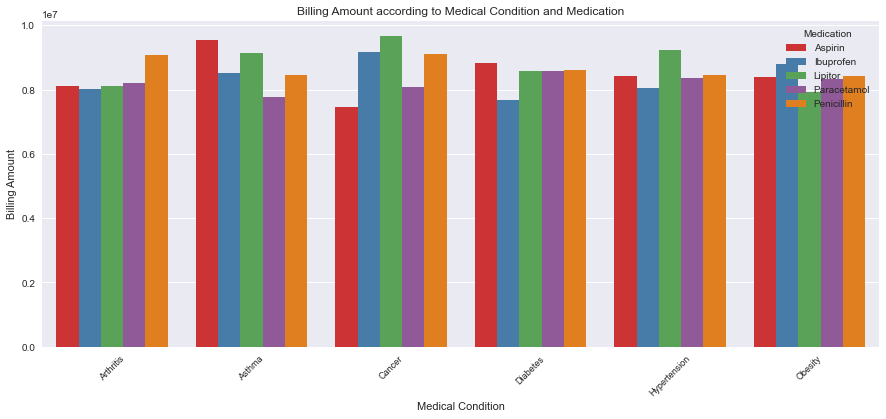

In [247]:
#show Billing Amount based on Medical Condition and Medication
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

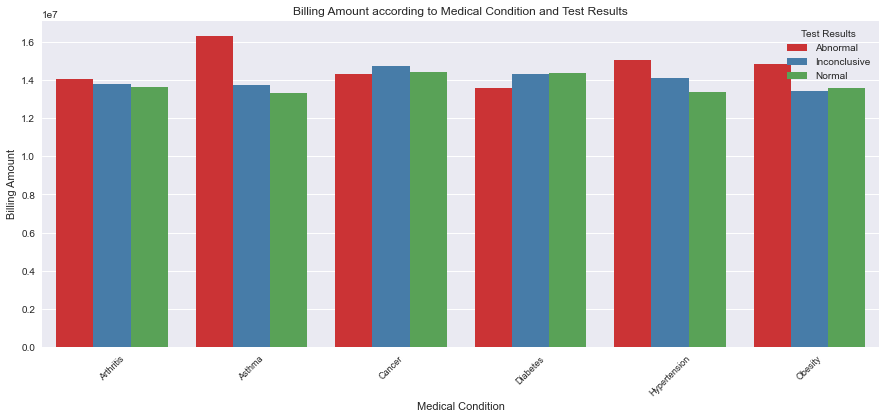

In [248]:
#show Billing Amount based on Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

In [249]:
cat_cols = ['Gender','Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type',
        'Medication']
num_cols = ['Age', 'Billing Amount', 'Days hospitalized']
target = 'Test Results'

In [250]:
cats_encoded=[]

for cat in cat_cols:
  df[cat]= df[cat].astype('category')
  df[cat+'_encoded'] = df[cat].cat.codes
  cats_encoded.append(cat+"_encoded")

df[cats_encoded].head(5)

,Gender_encoded,Blood Type_encoded,Medical Condition_encoded,Insurance Provider_encoded,Admission Type_encoded,Medication_encoded
0,0,7,3,3,0,0
1,1,6,1,4,1,2
2,1,5,5,3,1,2
3,1,5,1,3,2,4
4,1,7,0,4,2,3


In [251]:
one_hot_encoded_data = pd.get_dummies(df[cats_encoded], columns =cats_encoded)
one_hot_encoded_data.head()

,Gender_encoded_0,Gender_encoded_1,Blood Type_encoded_0,Blood Type_encoded_1,Blood Type_encoded_2,Blood Type_encoded_3,Blood Type_encoded_4,Blood Type_encoded_5,Blood Type_encoded_6,Blood Type_encoded_7,...,Insurance Provider_encoded_3,Insurance Provider_encoded_4,Admission Type_encoded_0,Admission Type_encoded_1,Admission Type_encoded_2,Medication_encoded_0,Medication_encoded_1,Medication_encoded_2,Medication_encoded_3,Medication_encoded_4
0,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [252]:
df[one_hot_encoded_data.columns] = one_hot_encoded_data.values
df = df.drop(columns=cat_cols)
df = df.drop(columns=cats_encoded)
df.head(5)

,Age,Billing Amount,Test Results,Days hospitalized,Gender_encoded_0,Gender_encoded_1,Blood Type_encoded_0,Blood Type_encoded_1,Blood Type_encoded_2,Blood Type_encoded_3,...,Insurance Provider_encoded_3,Insurance Provider_encoded_4,Admission Type_encoded_0,Admission Type_encoded_1,Admission Type_encoded_2,Medication_encoded_0,Medication_encoded_1,Medication_encoded_2,Medication_encoded_3,Medication_encoded_4
0,81,37490.983364,Inconclusive,14,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,35,47304.064845,Normal,14,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,61,36874.896997,Normal,30,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,49,23303.322092,Abnormal,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,51,18086.344184,Normal,24,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [253]:
df[target].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

In [254]:
lkp_target = {"Abnormal":0, "Inconclusive": 1, "Normal":2}
df[target] = df[target].map(lkp_target)
df[target]

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    0
Name: Test Results, Length: 10000, dtype: int64

In [255]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df[num_cols])
df[num_cols] = X_train_scaled

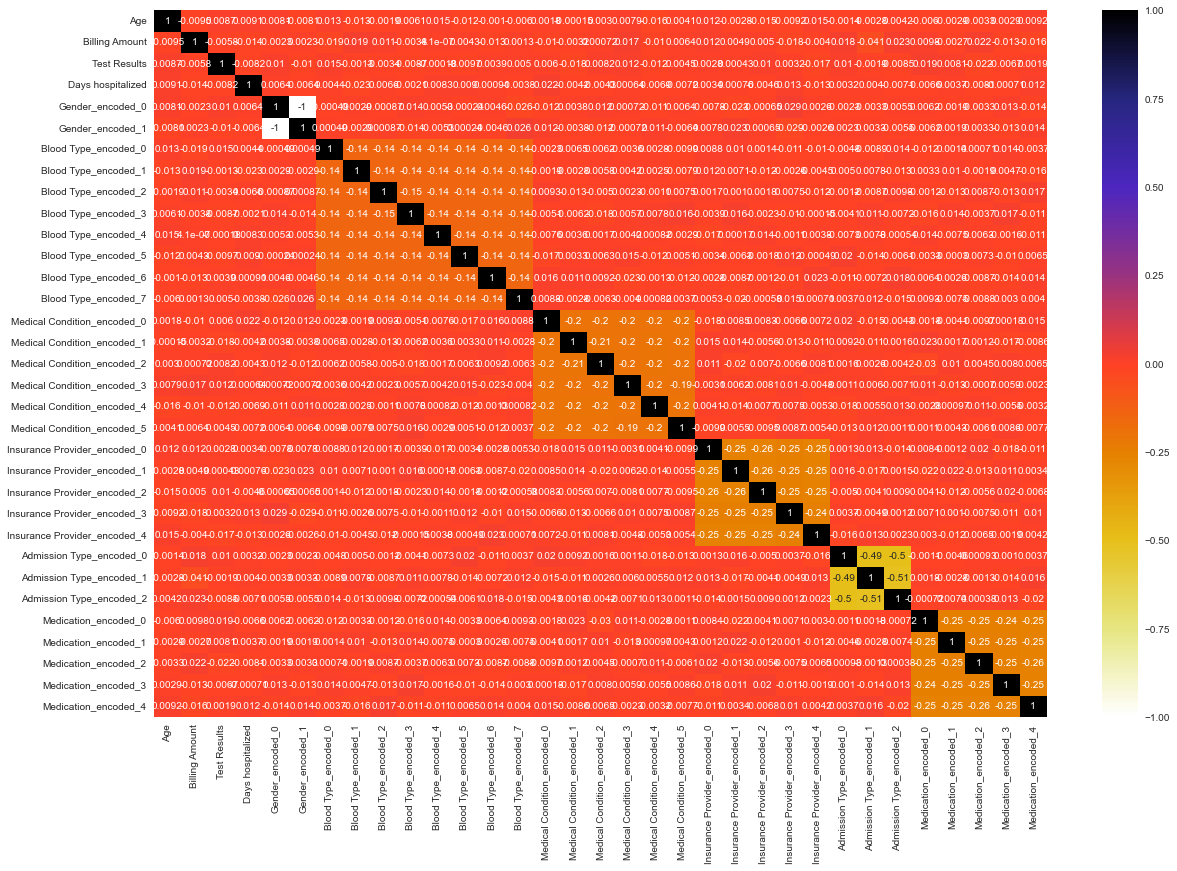

In [256]:
plt.figure(figsize = (20, 13))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [257]:
#Accuracy won't be high because the corelatian between features is not strong

In [258]:
#Classification using Random Forest Classifier
columns_except_price = df.columns.difference([target])
X = df[columns_except_price].values
Y = df[target].values

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.39      0.37       706
           1       0.32      0.32      0.32       636
           2       0.35      0.33      0.34       658

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000


Confusion Matrix:
[[273 220 213]
 [246 202 188]
 [235 209 214]]


In [260]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, Y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 0.68
R-squared (R2): 0.00


In [261]:
#Compare Results
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting'],
    'Accuracy': [accuracy, accuracy_logistic, accuracy_gb]
})

print('\nResults of Different Models:')
print(results)


Results of Different Models:
                 Model  Accuracy
0        Random Forest    0.3445
1  Logistic Regression    0.3325
2    Gradient Boosting    0.3330
